In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 224
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    print(np.array(data, dtype=object).shape)
    return np.array(data, dtype=object)

In [ ]:
train = get_training_data('/content/drive/MyDrive/Input/train')
test = get_training_data('/content/drive/MyDrive/Input/test')
val = get_training_data('/content/drive/MyDrive/Input/val')

(2698, 2)
(636, 2)
(16, 2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


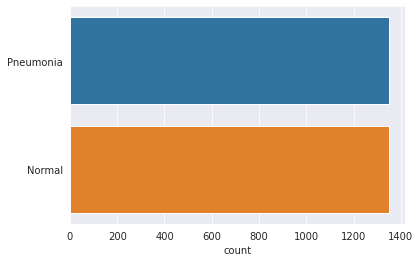

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(y = l)

Text(0.5, 1.0, 'NORMAL')

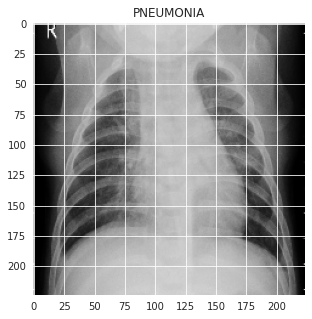

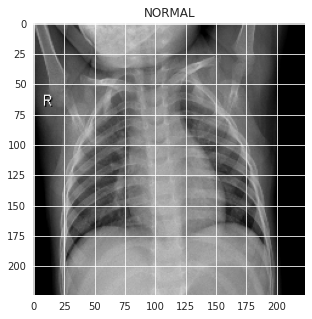

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

# print(x_train.shape)
# print(x_train)

In [ ]:
x_train = x_train.reshape(-1, img_size, img_size, 3)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 3)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 3)
y_test = np.array(y_test)

datagen = ImageDataGenerator(
        featurewise_center = False,  # Set Input Mean to 0 over the Dataset
        samplewise_center = False,  # Set each Sample Mean to 0
        featurewise_std_normalization = False,  # Divide Inputs by Std of the Dataset
        samplewise_std_normalization = False,  # Divide each Input by its std
        zca_whitening = False,  # Apply ZCA Whitening
        rotation_range = 30,  # Randomly rotate Images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom Image 
        width_shift_range = 0.1,  # Randomly shift Images horizontally (fraction of total width)
        height_shift_range = 0.1,  # Randomly shift Images vertically (fraction of total height)
        horizontal_flip = True,  # Randomly horizontal flip images
        vertical_flip = False)  # Randomly vertical flip images


datagen.fit(x_train)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), strides = 1, padding = 'same', activation = 'relu', input_shape = (224,224,3)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 1024, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))


model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = "rmsprop", loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                        

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1, factor=0.3, min_lr=0.000001)
print(len(x_train))
print(len(y_train))

2698
2698


In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size = 32), epochs = 100 , validation_data = datagen.flow(x_val, y_val), callbacks = [learning_rate_reduction])

Epoch 1/100
85/85 [==============================] - 49s 428ms/step - loss: 0.4714 - accuracy: 0.8210 - val_loss: 0.8589 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
85/85 [==============================] - 29s 346ms/step - loss: 0.3087 - accuracy: 0.8888 - val_loss: 5.1318 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/100
85/85 [==============================] - ETA: 0s - loss: 0.2686 - accuracy: 0.9085
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
85/85 [==============================] - 31s 361ms/step - loss: 0.2686 - accuracy: 0.9085 - val_loss: 4.2747 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
85/85 [==============================] - 29s 345ms/step - loss: 0.1826 - accuracy: 0.9299 - val_loss: 2.3913 - val_accuracy: 0.5000 - lr: 3.0000e-04
Epoch 5/100
85/85 [==============================] - ETA: 0s - loss: 0.1643 - accuracy: 0.9407
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
85/85 [==============================]

In [ ]:
print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, '%')
# model.save('/content/drive/MyDrive/Colab Notebooks/Custom')

20/20 [==============================] - 2s 64ms/step - loss: 0.2482 - accuracy: 0.9057
Loss of the model is -  0.24820896983146667
20/20 [==============================] - 1s 31ms/step - loss: 0.2482 - accuracy: 0.9057
Accuracy of the model is -  90.56603908538818 %


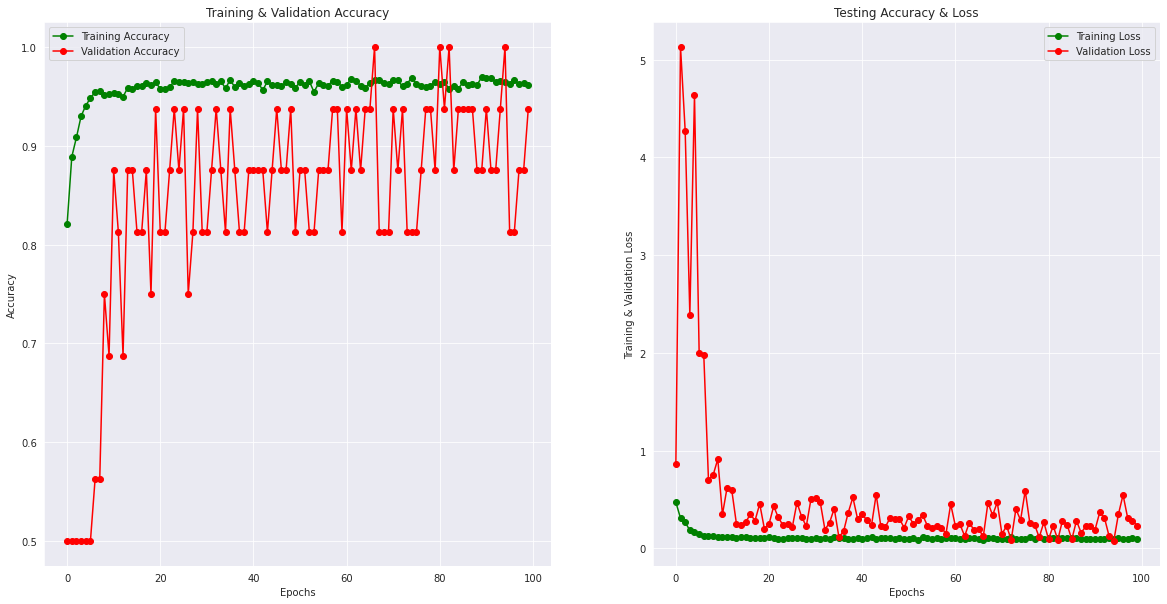

In [ ]:
epochs = [i for i in range(100)]
fig, ax = plt.subplots(1, 2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20, 10)

ax[0].plot(epochs, train_acc, 'go-', label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label = 'Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1, -1)[0]
predictions[:15]

20/20 [==============================] - 1s 31ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

In [ ]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)', 'Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.94      0.91      0.92       402
   Normal (Class 1)       0.85      0.90      0.88       234

           accuracy                           0.91       636
          macro avg       0.90      0.90      0.90       636
       weighted avg       0.91      0.91      0.91       636



In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[365  37]
 [ 23 211]]


In [ ]:
cm = pd.DataFrame(cm , index = ['0', '1'], columns = ['0', '1'])

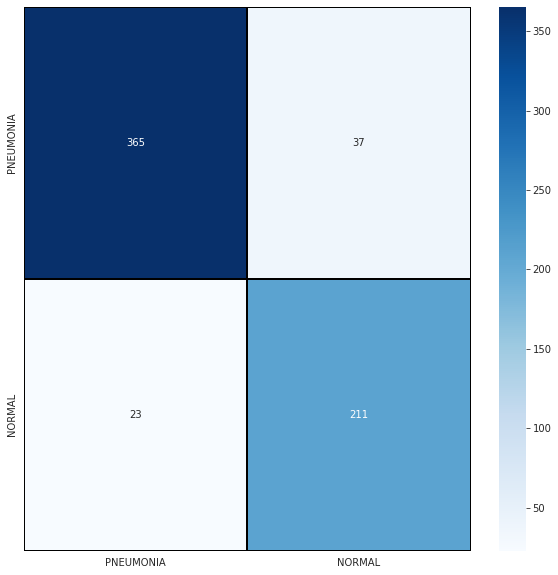

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black', linewidth = 1, annot = True, fmt='', xticklabels = labels, yticklabels = labels)

In [ ]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

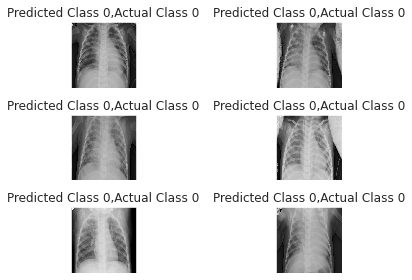

In [ ]:
i = 0
for c in correct[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224, 224, 3), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

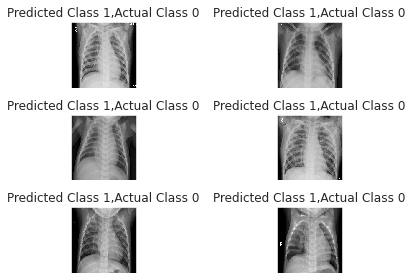

In [ ]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(224, 224, 3), interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1